# Model Exploration

- ## I. Load and import libraries + train test split

In [66]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Linear Regression
from sklearn.linear_model import LinearRegression

# Model Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forrest
from sklearn.ensemble import RandomForestRegressor

# Feature Selection
from sklearn.model_selection import GridSearchCV

# Bagging
from sklearn.ensemble import BaggingRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor


# Validation
import math # for rmse
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
df = pd.read_csv('housing_clean_imputed_data.csv')
df

,sale_year,zone,cats_allowed,dogs_allowed,coop_condo,garage_exists,num_bedrooms,num_floors_in_building,num_full_bathrooms,num_half_bathrooms,...,dining_room_type,fuel_type,kitchen_type,community_district_num,approx_year_built,sq_footage,walk_score,maintenance_cost,parking_charges,sale_price
0,2016.00,7.0,1.0,1.0,1.0,0.0,1.0,2.00,1.0,0.0,...,3.00,3.0,4.0,26.0,1949.0,585.00,83.0,529.00,0.0,170454.0
1,2016.00,2.0,0.0,0.0,2.0,0.0,2.0,7.24,2.0,0.0,...,5.00,5.0,5.0,25.0,2007.0,1075.00,98.0,720.52,0.0,565000.0
2,2016.08,6.0,1.0,1.0,2.0,0.0,5.0,2.00,2.0,0.0,...,3.00,3.0,5.0,28.0,1951.0,980.00,77.0,800.34,0.0,386632.0
3,2016.12,3.0,1.0,1.0,1.0,0.0,1.0,2.00,1.0,0.0,...,5.00,1.0,2.0,25.0,1955.0,700.00,88.0,658.00,0.0,158540.0
4,2016.28,9.0,0.0,0.0,1.0,0.0,1.0,6.00,1.0,0.0,...,5.00,1.0,2.0,30.0,1940.0,659.68,99.0,783.00,0.0,155370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,2016.00,3.0,0.0,0.0,1.0,0.0,1.0,2.00,1.0,0.0,...,3.00,5.0,4.0,25.0,1950.0,764.84,67.0,735.00,0.0,169000.0
2175,2016.02,2.0,1.0,1.0,2.0,0.0,2.0,7.34,2.0,0.0,...,3.58,3.0,4.0,25.0,1987.0,1115.54,97.0,757.58,0.0,595070.0
2176,2016.00,6.0,0.0,0.0,1.0,0.0,2.0,10.60,2.0,0.0,...,5.00,3.0,2.0,24.0,1968.0,1134.90,88.0,863.00,0.0,496851.0
2177,2016.26,6.0,0.0,0.0,1.0,1.0,1.0,6.00,1.0,0.0,...,4.10,1.0,4.0,28.0,1939.0,100.00,98.0,909.00,165.0,152130.0


### Train + Validation, Test Split

In [68]:
X = df.drop('sale_price', axis=1)
y = df['sale_price']

# First split: split into train+validation and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: split train+validation into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Now you have train, validation, and test sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 1307
Validation set size: 436
Test set size: 436


## II. Linear Regression 

In [69]:
# Initialize the linear regression model
simple_lm = LinearRegression()

# Fit the model on the training data
simple_lm.fit(X_train, y_train)

# Predict on the validation data
simple_lm_y_pred = simple_lm.predict(X_val)

# Evaluate the model
simple_lm_mse = mean_squared_error(y_val, simple_lm_y_pred)
simple_lm_r2 = r2_score(y_val, simple_lm_y_pred)

print(f"Mean Squared Error on Validation Set: {simple_lm_mse}")
print(f"Root mean Squared Units (UNIT OF TARGET): {math.sqrt(simple_lm_mse)}")
print(f"R^2 Score on Validation Set: {simple_lm_r2}")

Mean Squared Error on Validation Set: 4348737541.035043
Root mean Squared Units (UNIT OF TARGET): 65944.95842014796
R^2 Score on Validation Set: 0.8515349932032527


## III. Linear regression with top_K_features

In [70]:
# Select top k features
k = 10  # choose the number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Fit the model on selected features
lm_kfeatures = LinearRegression()
lm_kfeatures.fit(X_train_selected, y_train)

# Predict on the validation set
lm_kfeatures_y_pred = lm_kfeatures.predict(X_val_selected)

# Evaluate the model
lm_kfeatures_mse = mean_squared_error(y_val, lm_kfeatures_y_pred)
lm_kfeatures_r2 = r2_score(y_val, lm_kfeatures_y_pred)

print(f"Mean Squared Error on Validation Set: {lm_kfeatures_mse}")
print(f"Root mean Squared Units (UNIT OF TARGET): {math.sqrt(lm_kfeatures_mse)}")
print(f"R^2 Score on Validation Set: {lm_kfeatures_r2}")

Mean Squared Error on Validation Set: 4637488881.221946
Root mean Squared Units (UNIT OF TARGET): 68099.11072269554
R^2 Score on Validation Set: 0.8416770817337977


## IV. Decision Tree

In [71]:
# Define the parameter grid
dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
dt_grid_search.fit(X_train, y_train)

# Get the best model
best_dt = dt_grid_search.best_estimator_

# Predict on the validation set
best_dt_y_pred = best_dt.predict(X_val)

# Evaluate the model
best_dt_mse = mean_squared_error(y_val, best_dt_y_pred)
best_dt_r2 = r2_score(y_val, best_dt_y_pred)

print(f"Best Hyperparameters: {dt_grid_search.best_params_}")
print(f"Mean Squared Error on Validation Set: {best_dt_mse}")
print(f"Root mean Squared Units (UNIT OF TARGET): {math.sqrt(best_dt_mse)}")
print(f"R^2 Score on Validation Set: {best_dt_r2}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error on Validation Set: 1683081073.2161603
Root mean Squared Units (UNIT OF TARGET): 41025.37109175443
R^2 Score on Validation Set: 0.9425399577195361


# V. Random Forrest

In [72]:
# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Get the best model
best_rf = rf_grid_search.best_estimator_

# Predict on the validation set
best_rf_y_pred = best_rf.predict(X_val)

# Evaluate the model
rf_mse = mean_squared_error(y_val, best_rf_y_pred)
rf_rmse = math.sqrt(rf_mse)
rf_r2 = r2_score(y_val, best_rf_y_pred)

### Random Forrest Results

In [73]:
print(f"Best Hyperparameters: {rf_grid_search.best_params_}")
print(f"Mean Squared Error on Validation Set: {rf_mse}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"R^2 Score on Validation Set: {rf_r2}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error on Validation Set: 962788314.0700483
Root Mean Squared Error (RMSE): 31028.830369030158
R^2 Score on Validation Set: 0.9671306046310126


## VI. Bagged Trees

In [74]:
# Define the parameter grid
bagged_param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 30, 40, 50],
    'base_estimator__min_samples_split': [2, 10, 20],
    'base_estimator__min_samples_leaf': [1, 2, 4, 8, 16],
    'n_estimators': [10, 50, 100]  # Number of trees in the ensemble
}

# Initialize the Bagging Regressor with a Decision Tree Regressor as the base estimator
base_dt = DecisionTreeRegressor(random_state=42)
bagged_dt = BaggingRegressor(base_estimator=base_dt, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagged_dt, param_grid=bagged_param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract results
bagged_dt_results = grid_search.cv_results_

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Bagged Trees Results


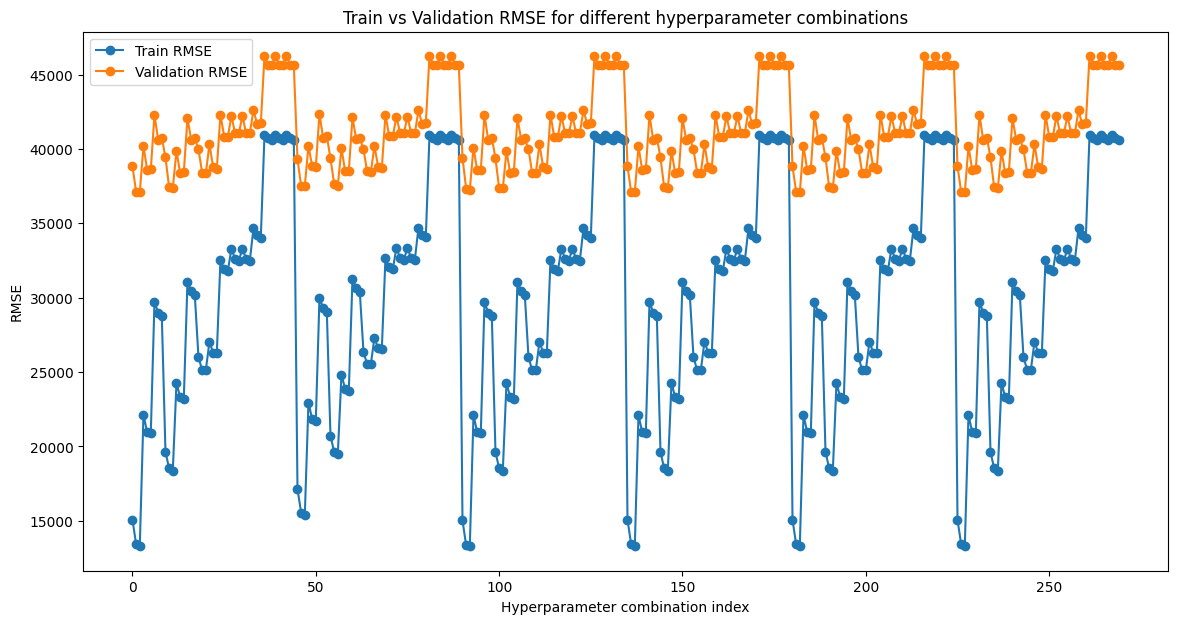

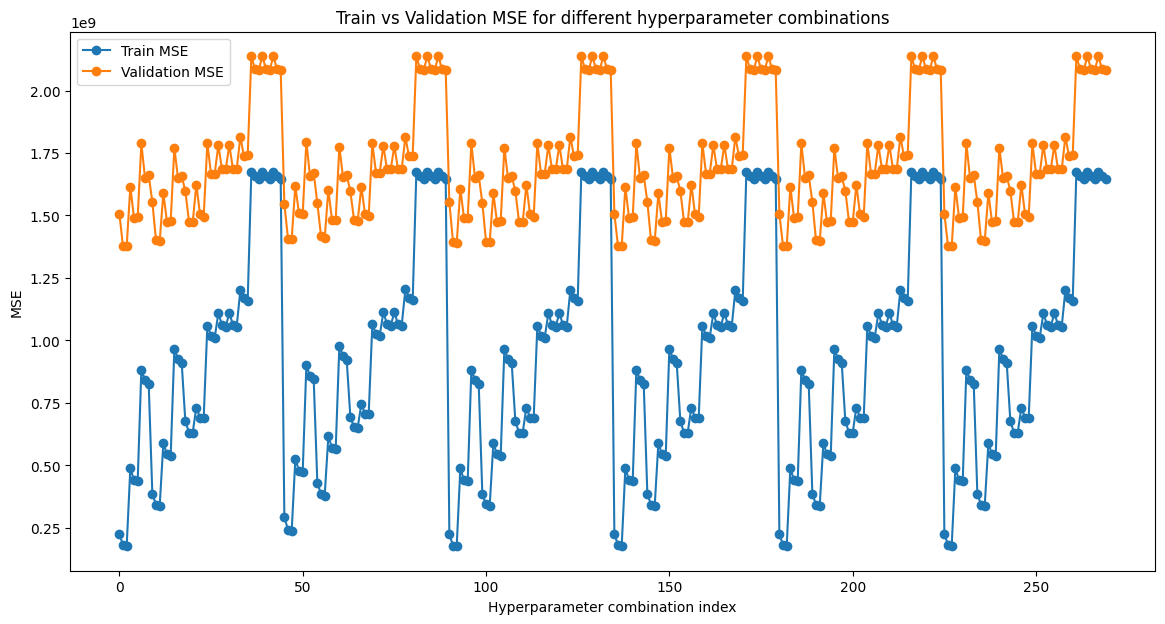

In [75]:
# Calculate RMSE and MSE for training and validation sets
bagged_train_rmse = np.sqrt(-bagged_dt_results['mean_train_score'])
bagged_val_rmse = np.sqrt(-bagged_dt_results['mean_test_score'])
bagged_train_mse = -bagged_dt_results['mean_train_score']
bagged_val_mse = -bagged_dt_results['mean_test_score']

# Plot RMSE
plt.figure(figsize=(14, 7))
plt.plot(bagged_train_rmse, label='Train RMSE', marker='o')
plt.plot(bagged_val_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Hyperparameter combination index')
plt.ylabel('RMSE')
plt.title('Train vs Validation RMSE for different hyperparameter combinations')
plt.legend()
plt.show()

# Plot MSE
plt.figure(figsize=(14, 7))
plt.plot(bagged_train_mse, label='Train MSE', marker='o')
plt.plot(bagged_val_mse, label='Validation MSE', marker='o')
plt.xlabel('Hyperparameter combination index')
plt.ylabel('MSE')
plt.title('Train vs Validation MSE for different hyperparameter combinations')
plt.legend()
plt.show()

In [76]:
# Print the best parameters and scores
best_bagged = grid_search.best_estimator_
y_pred_bagged = best_bagged.predict(X_val)
bagged_mse = mean_squared_error(y_val, y_pred_bagged)
bagged_rmse = np.sqrt(bagged_mse)
bagged_r2 = r2_score(y_val, y_pred_bagged)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error on Validation Set: {bagged_mse}")
print(f"Root Mean Squared Error (RMSE): {bagged_rmse}")
print(f"R^2 Score on Validation Set: {bagged_r2}")

Best Hyperparameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error on Validation Set: 961789751.960797
Root Mean Squared Error (RMSE): 31012.735318910472
R^2 Score on Validation Set: 0.9671646953364043


# VII Model Selection

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to evaluate and print model performance
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, RMSE: {rmse}, R²: {r2}")
    return mse, rmse, r2

# List to hold results
results = []

# Predict and evaluate each model on the test set

# Simple Linear Model
simple_lm_mse, simple_lm_rmse, simple_lm_r2 = evaluate_model("Simple Linear Model", simple_lm, X_test, y_test)
results.append(("Simple Linear Model", simple_lm_mse, simple_lm_rmse, simple_lm_r2))

# Best Decision Tree
best_dt_mse, best_dt_rmse, best_dt_r2 = evaluate_model("Best Decision Tree", best_dt, X_test, y_test)
results.append(("Best Decision Tree", best_dt_mse, best_dt_rmse, best_dt_r2))

# Best Random Forest
best_rf_mse, best_rf_rmse, best_rf_r2 = evaluate_model("Best Random Forest", best_rf, X_test, y_test)
results.append(("Best Random Forest", best_rf_mse, best_rf_rmse, best_rf_r2))

# Best Bagged Decision Tree
bagged_mse, bagged_rmse, bagged_r2 = evaluate_model("Best Bagged Decision Tree", best_bagged, X_test, y_test)
results.append(("Best Bagged Decision Tree", bagged_mse, bagged_rmse, bagged_r2))

# Output all results
print("\nModel Evaluation on Test Set:")
for name, mse, rmse, r2 in results:
    print(f"{name}: MSE = {mse}, RMSE = {rmse}, R² = {r2}")

# Determine the best model based on RMSE
best_model_name, best_model_mse, best_model_rmse, best_model_r2 = min(results, key=lambda x: x[2])
print(f"\nBest Model: {best_model_name} with RMSE = {best_model_rmse}")

# Train the best model on the entire dataset (X and y)
best_model = None
if best_model_name == "Simple Linear Model":
    best_model = simple_lm
elif best_model_name == "Linear Model with k features":
    best_model = lm_kfeatures
elif best_model_name == "Best Decision Tree":
    best_model = best_dt
elif best_model_name == "Best Random Forest":
    best_model = best_rf
elif best_model_name == "Best Bagged Decision Tree":
    best_model = best_bagged

# Fit the best model on the entire dataset
best_model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

# Print final model details
print(f"\nFinal model trained on the entire dataset: {best_model_name}")


Simple Linear Model - MSE: 5556479114.205616, RMSE: 74541.7944123001, R²: 0.7996912758197945
Best Decision Tree - MSE: 2000960176.1023357, RMSE: 44732.09335703322, R²: 0.9278662311560294
Best Random Forest - MSE: 1812071612.0233126, RMSE: 42568.43445586545, R²: 0.9346755840763291
Best Bagged Decision Tree - MSE: 1795898789.6211407, RMSE: 42378.04608073785, R²: 0.935258607490111

Model Evaluation on Test Set:
Simple Linear Model: MSE = 5556479114.205616, RMSE = 74541.7944123001, R² = 0.7996912758197945
Best Decision Tree: MSE = 2000960176.1023357, RMSE = 44732.09335703322, R² = 0.9278662311560294
Best Random Forest: MSE = 1812071612.0233126, RMSE = 42568.43445586545, R² = 0.9346755840763291
Best Bagged Decision Tree: MSE = 1795898789.6211407, RMSE = 42378.04608073785, R² = 0.935258607490111

Best Model: Best Bagged Decision Tree with RMSE = 42378.04608073785


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Final model trained on the entire dataset: Best Bagged Decision Tree


In [77]:
# # Define the parameter grid
# gbdt_param_grid = {
#     'max_depth': [None, 3, 5, 10, 20, 30],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 8, 16],
#     'n_estimators': [50, 100, 200],  # Number of boosting stages
#     'learning_rate': [0.01, 0.1, 0.2]  # Learning rate
# }

# # Initialize the Gradient Boosting Regressor
# gbr = GradientBoostingRegressor(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=gbr, param_grid=gbdt_param_grid, 
#                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1, return_train_score=True)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Extract results
# gbdt_results = grid_search.cv_results_

### Gradient Boosted Decision Trees Output

In [78]:
# # Calculate RMSE and MSE for training and validation sets
# gbdt_train_rmse = np.sqrt(-gbdt_results['mean_train_score'])
# gbdt_val_rmse = np.sqrt(-gbdt_results['mean_test_score'])
# gbdt_train_mse = -gbdt_results['mean_train_score']
# val_mse = -gbdt_results['mean_test_score']

# # Plot RMSE
# plt.figure(figsize=(14, 7))
# plt.plot(train_rmse, label='Train RMSE', marker='o')
# plt.plot(val_rmse, label='Validation RMSE', marker='o')
# plt.xlabel('Hyperparameter combination index')
# plt.ylabel('RMSE')
# plt.title('Train vs Validation RMSE for different hyperparameter combinations')
# plt.legend()
# plt.show()

# # Plot MSE
# plt.figure(figsize=(14, 7))
# plt.plot(train_mse, label='Train MSE', marker='o')
# plt.plot(val_mse, label='Validation MSE', marker='o')
# plt.xlabel('Hyperparameter combination index')
# plt.ylabel('MSE')
# plt.title('Train vs Validation MSE for different hyperparameter combinations')
# plt.legend()
# plt.show()

# # Print the best parameters and scores
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_val)
# mse = mean_squared_error(y_val, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_val, y_pred)

# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"Mean Squared Error on Validation Set: {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"R^2 Score on Validation Set: {r2}")

# VIII. Results

## In sample RMSE VS Out of Sample RMSE

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


Simple Linear Model - Train RMSE: 67995.2253200972, Test RMSE: 74541.7944123001
Best Decision Tree - Train RMSE: 29809.65178309314, Test RMSE: 44732.09335703322
Best Random Forest - Train RMSE: 18963.84483085076, Test RMSE: 42568.43445586545
Best Bagged Decision Tree - Train RMSE: 12222.997211626665, Test RMSE: 38064.71686505785


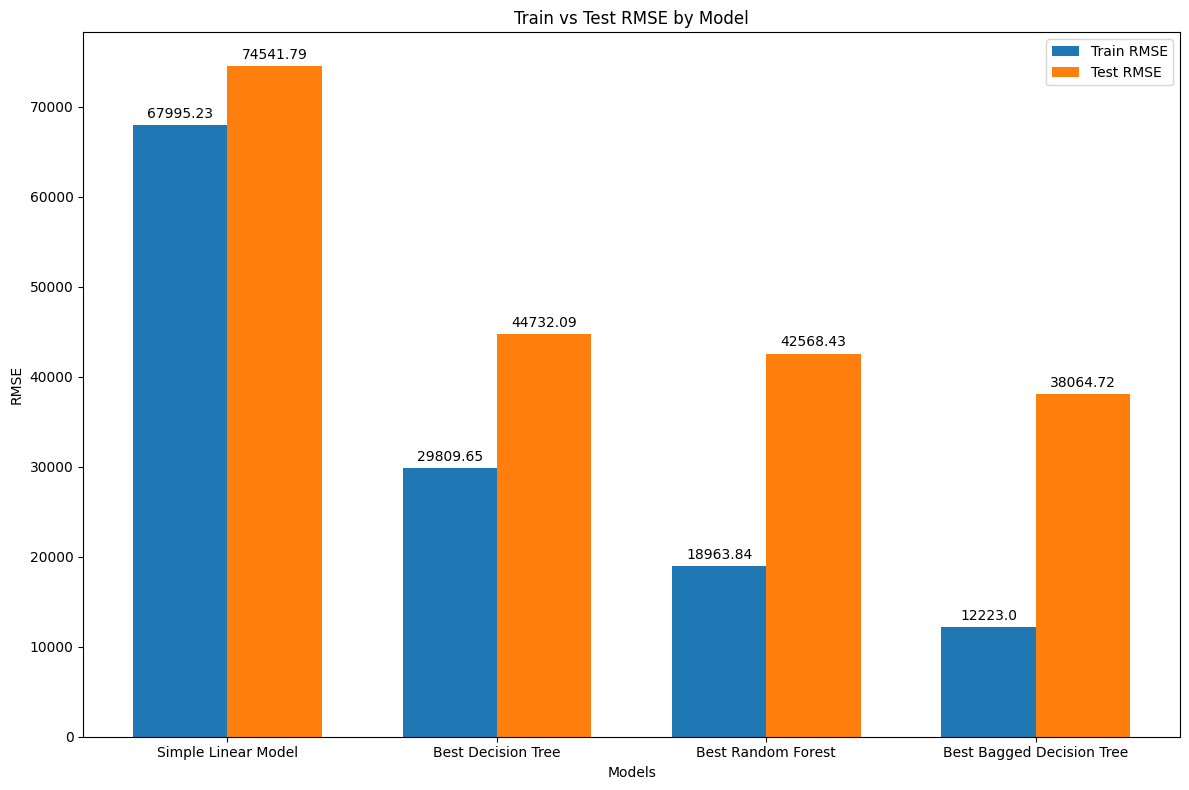

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to evaluate and print model performance
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"{name} - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    
    return train_rmse, test_rmse

# List to hold results
results = []

# Evaluate each model on the training and test sets

# Simple Linear Model
simple_lm_train_rmse, simple_lm_test_rmse = evaluate_model("Simple Linear Model", simple_lm, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), X_test, y_test)
results.append(("Simple Linear Model", simple_lm_train_rmse, simple_lm_test_rmse))

# Best Decision Tree
best_dt_train_rmse, best_dt_test_rmse = evaluate_model("Best Decision Tree", best_dt, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), X_test, y_test)
results.append(("Best Decision Tree", best_dt_train_rmse, best_dt_test_rmse))

# Best Random Forest
best_rf_train_rmse, best_rf_test_rmse = evaluate_model("Best Random Forest", best_rf, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), X_test, y_test)
results.append(("Best Random Forest", best_rf_train_rmse, best_rf_test_rmse))

# Best Bagged Decision Tree
best_bagged_train_rmse, best_bagged_test_rmse = evaluate_model("Best Bagged Decision Tree", best_bagged, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), X_test, y_test)
results.append(("Best Bagged Decision Tree", best_bagged_train_rmse, best_bagged_test_rmse))

# Plot the RMSE scores
model_names = [result[0] for result in results]
train_rmses = [result[1] for result in results]
test_rmses = [result[2] for result in results]

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, train_rmses, width, label='Train RMSE')
bars2 = ax.bar(x + width/2, test_rmses, width, label='Test RMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Train vs Test RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Attach a text label above each bar in *bars1* and *bars2*, displaying its height.
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

plt.show()


## In sample R^2 vs Out of sample R^2

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Simple Linear Model - Train RMSE: 67995.2253200972, Test RMSE: 74541.7944123001
Best Decision Tree - Train RMSE: 29809.65178309314, Test RMSE: 44732.09335703322
Best Random Forest - Train RMSE: 18963.84483085076, Test RMSE: 42568.43445586545


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


Best Bagged Decision Tree - Train RMSE: 12222.997211626665, Test RMSE: 38064.71686505785


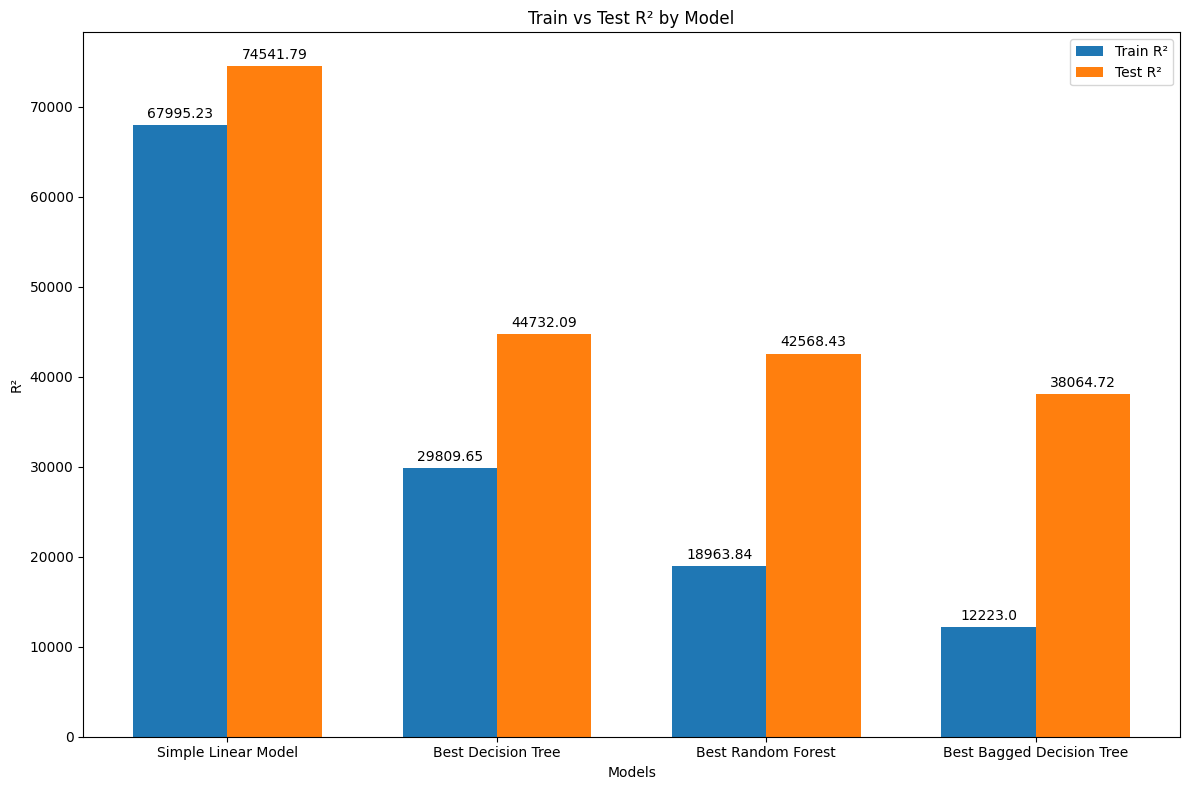

In [83]:
# List to hold results
r2_results = []


# Evaluate each model on the training and test sets

# Simple Linear Model
simple_lm_train_r2, simple_lm_test_r2 = evaluate_model("Simple Linear Model", simple_lm, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), X_test, y_test)
r2_results.append(("Simple Linear Model", simple_lm_train_r2, simple_lm_test_r2))

# Best Decision Tree
best_dt_train_r2, best_dt_test_r2 = evaluate_model("Best Decision Tree", best_dt, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), X_test, y_test)
r2_results.append(("Best Decision Tree", best_dt_train_r2, best_dt_test_r2))

# Best Random Forest
best_rf_train_r2, best_rf_test_r2 = evaluate_model("Best Random Forest", best_rf, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), X_test, y_test)
r2_results.append(("Best Random Forest", best_rf_train_r2, best_rf_test_r2))

# Best Bagged Decision Tree
best_bagged_train_r2, best_bagged_test_r2 = evaluate_model("Best Bagged Decision Tree", best_bagged, np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), X_test, y_test)
r2_results.append(("Best Bagged Decision Tree", best_bagged_train_r2, best_bagged_test_r2))

# Extract results for plotting
model_names = [result[0] for result in r2_results]
train_r2s = [result[1] for result in r2_results]
test_r2s = [result[2] for result in r2_results]

# Plot R²
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, train_r2s, width, label='Train R²')
bars2 = ax.bar(x + width/2, test_r2s, width, label='Test R²')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('R²')
ax.set_title('Train vs Test R² by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Attach a text label above each bar in *bars1* and *bars2*, displaying its height.
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()
plt.show()

## Best Model: `Bagged Decision Trees` 
## Best Hyperparameters: `{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}`
## In sample metrics 
- `Mean Squared Error on Validation Set:` 962788314.0700483
- `Root Mean Squared Error (RMSE):` 31028.830369030158
- `R^2 Score on Validation Set:` 0.9671306046310126
## Out of sample Metrics 
### ` Best Bagged Decision Tree` - Test RMSE: 38064.71686505785 